In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_absolute_error,make_scorer,classification_report, confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [5]:
df = pd.read_csv('Train_Preprocessed_LamaKuliah.csv')
df.head(100)

,Bahasa,Inggris,TIK,Matematika,Fisika,Kimia,Biologi,Geografi,Sosiologi,Antropologi,...,Extra_Kurikuler_Ekskul_3,Extra_Kurikuler_Ekskul_4,Extra_Kurikuler_Ekskul_5,Extra_Kurikuler_Ekskul_6,Extra_Kurikuler_Tidak,Tinggal_Dengan_Orang Tua,Tinggal_Dengan_Others,Status_Kerja_Belum,Biaya_Orang Tua,Biaya_Others
0,69.8,64.6,64.0,81.5,88.2,86.7,68.3,74.0,67.7,70.7,...,0,1,0,0,0,0,0,1,0,0
1,68.7,88.3,80.9,80.7,67.8,67.3,72.1,77.3,64.4,62.8,...,0,1,0,0,0,0,1,1,0,1
2,83.8,79.8,79.2,66.3,82.3,82.7,74.2,84.0,75.4,65.9,...,0,0,0,0,0,0,1,0,0,0
3,66.7,63.7,64.0,60.2,75.9,87.6,85.6,68.1,73.7,61.7,...,0,1,0,0,0,1,0,1,0,0
4,62.3,76.8,77.0,87.1,65.1,65.7,70.8,67.0,77.3,79.0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,65.4,66.9,78.8,74.6,60.7,79.3,62.5,69.9,78.3,88.0,...,0,1,0,0,0,0,1,0,0,0
96,75.0,65.6,87.7,74.0,63.7,64.7,60.1,87.6,80.9,78.0,...,0,0,1,0,0,0,1,1,0,0
97,81.4,60.6,60.5,87.6,88.0,88.0,74.7,74.3,85.8,74.9,...,0,0,0,0,0,1,0,0,0,0
98,66.2,77.7,86.0,64.2,86.4,66.8,84.5,87.7,77.0,76.5,...,0,0,0,0,1,0,1,1,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11499 entries, 0 to 11498
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Bahasa                    11499 non-null  float64
 1   Inggris                   11499 non-null  float64
 2   TIK                       11499 non-null  float64
 3   Matematika                11499 non-null  float64
 4   Fisika                    11499 non-null  float64
 5   Kimia                     11499 non-null  float64
 6   Biologi                   11499 non-null  float64
 7   Geografi                  11499 non-null  float64
 8   Sosiologi                 11499 non-null  float64
 9   Antropologi               11499 non-null  float64
 10  Fakultas                  11499 non-null  object 
 11  Lama_Kuliah               11499 non-null  float64
 12  Mean_Nilai                11499 non-null  float64
 13  Mean_IPA                  11499 non-null  float64
 14  Mean_B

In [6]:
df=df.drop(columns=["Fakultas"])

# EDA

<AxesSubplot: >

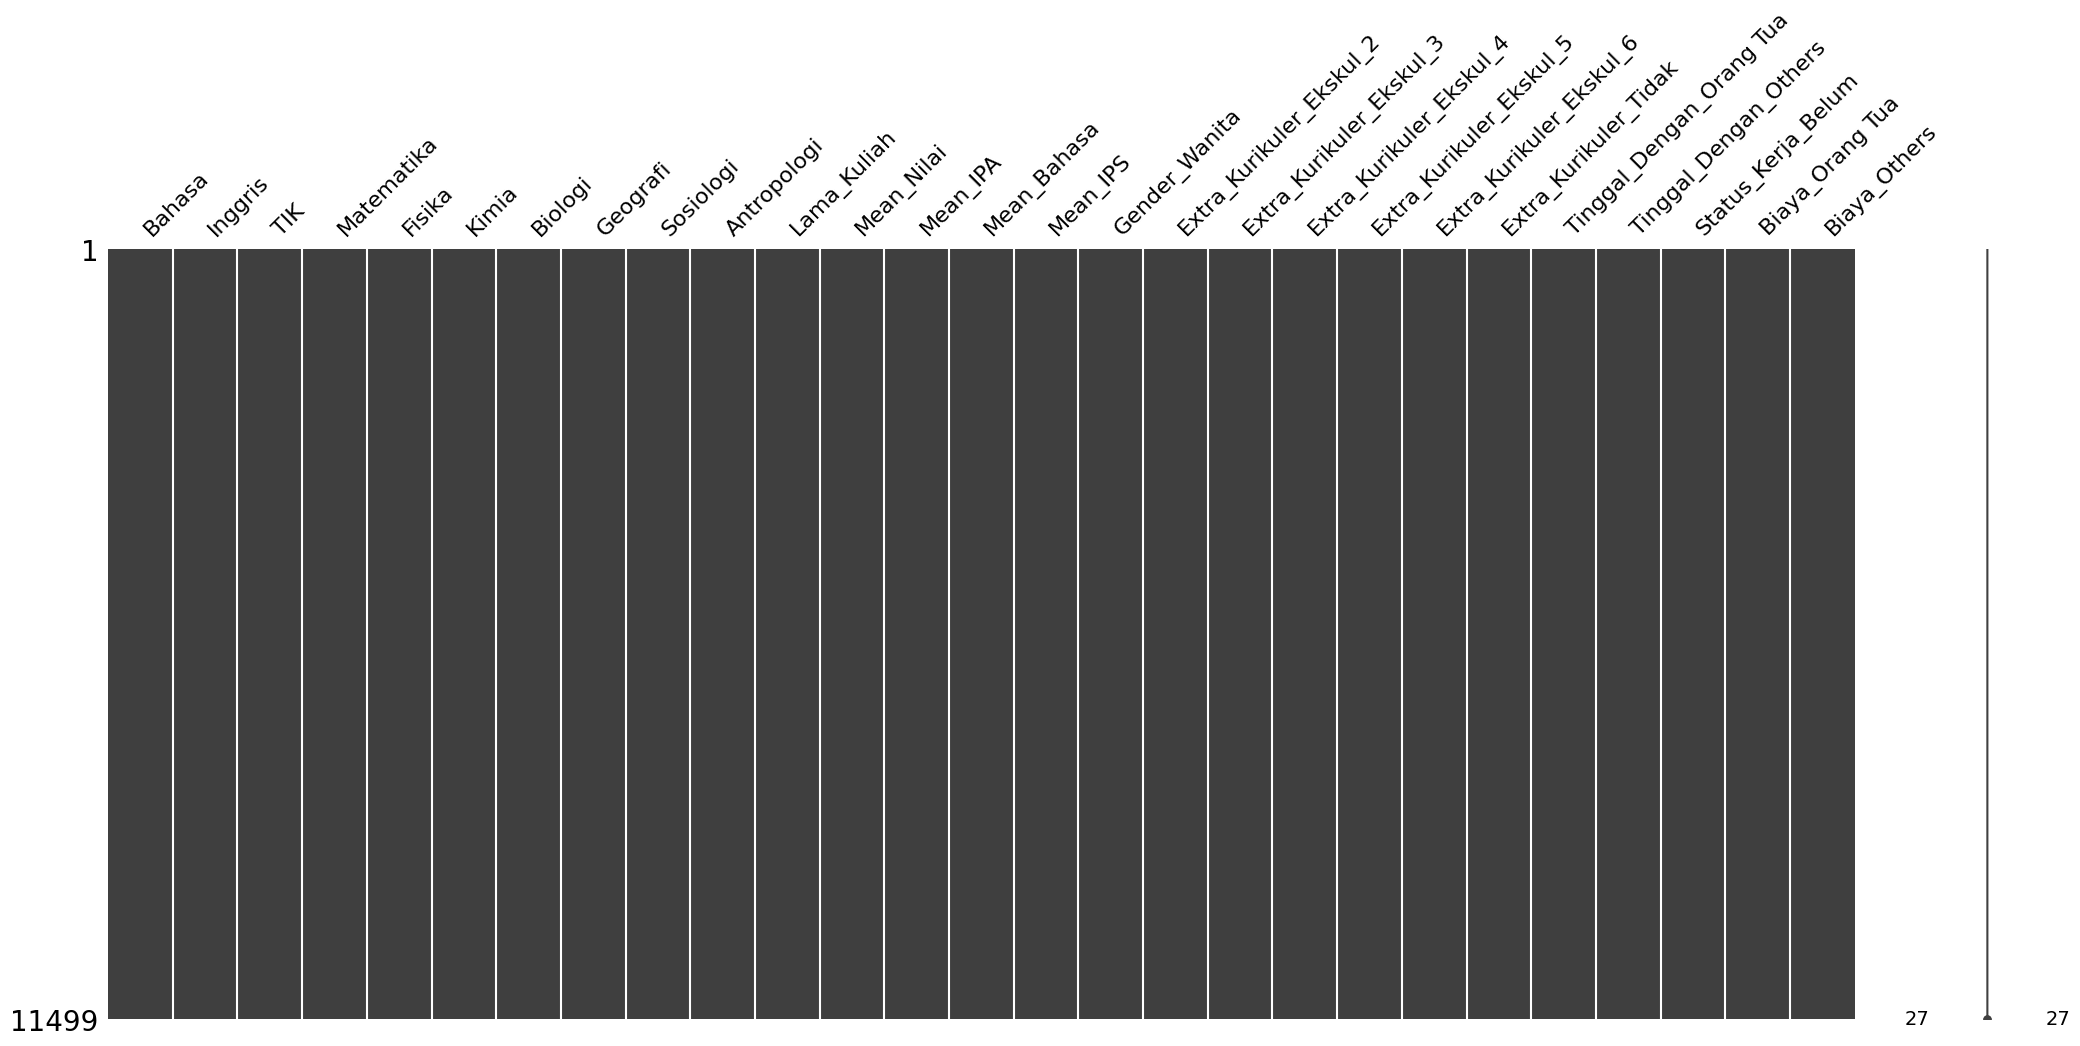

In [5]:
msno.matrix(df)

In [7]:
df["Lama_Kuliah"] = df["Lama_Kuliah"].astype(str) 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11499 entries, 0 to 11498
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Bahasa                    11499 non-null  float64
 1   Inggris                   11499 non-null  float64
 2   TIK                       11499 non-null  float64
 3   Matematika                11499 non-null  float64
 4   Fisika                    11499 non-null  float64
 5   Kimia                     11499 non-null  float64
 6   Biologi                   11499 non-null  float64
 7   Geografi                  11499 non-null  float64
 8   Sosiologi                 11499 non-null  float64
 9   Antropologi               11499 non-null  float64
 10  Lama_Kuliah               11499 non-null  object 
 11  Mean_Nilai                11499 non-null  float64
 12  Mean_IPA                  11499 non-null  float64
 13  Mean_Bahasa               11499 non-null  float64
 14  Mean_I

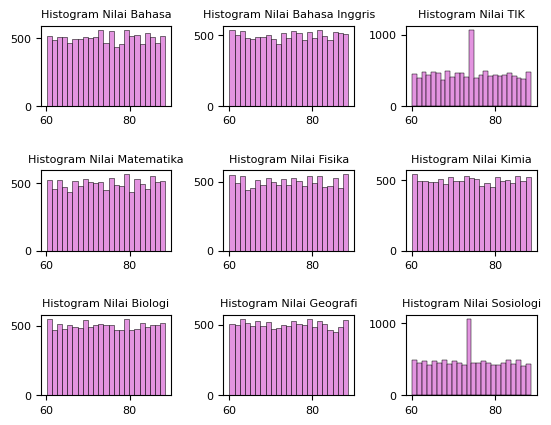

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
color = 'orchid'
fig = plt.figure()
fig.subplots_adjust(hspace=0.8, wspace=0.4)


ax = fig.add_subplot(3, 3, 1)
sns.histplot(df["Bahasa"],ax=ax,color = color)
plt.title("Histogram Nilai Bahasa", fontsize = 8)
plt.xlabel('')
plt.ylabel('')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

ax = fig.add_subplot(3, 3, 2)
sns.histplot(df["Inggris"],ax=ax,color = color)
plt.title("Histogram Nilai Bahasa Inggris", fontsize = 8)
plt.xlabel('')
plt.ylabel('')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

ax = fig.add_subplot(3, 3, 3)
sns.histplot(df["TIK"], ax=ax,color = color)
plt.title("Histogram Nilai TIK", fontsize = 8)
plt.xlabel('')
plt.ylabel('')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

ax = fig.add_subplot(3, 3, 4)
sns.histplot(df["Matematika"],ax=ax,color = color)
plt.title("Histogram Nilai Matematika", fontsize = 8)
plt.xlabel('')
plt.ylabel('')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

ax = fig.add_subplot(3, 3, 5)
sns.histplot(df["Fisika"],ax=ax,color = color)
plt.title("Histogram Nilai Fisika", fontsize = 8)
plt.xlabel('')
plt.ylabel('')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

ax = fig.add_subplot(3, 3, 6)
sns.histplot(df["Kimia"],ax=ax,color = color)
plt.title("Histogram Nilai Kimia", fontsize = 8)
plt.xlabel('')
plt.ylabel('')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

ax = fig.add_subplot(3, 3, 7)
sns.histplot(df["Biologi"],ax=ax,color = color)
plt.title("Histogram Nilai Biologi", fontsize = 8)
plt.xlabel('')
plt.ylabel('')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

ax = fig.add_subplot(3, 3, 8)
sns.histplot(df["Geografi"],ax=ax,color = color)
plt.title("Histogram Nilai Geografi", fontsize = 8)
plt.xlabel('')
plt.ylabel('')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

ax = fig.add_subplot(3, 3, 9)
sns.histplot(df["Sosiologi"],ax=ax,color = color)
plt.title("Histogram Nilai Sosiologi", fontsize = 8)
plt.xlabel('')
plt.ylabel('')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.savefig('NilaiMasing2.png')
plt.show()



Text(0.5, 1.0, 'Histogram Nilai Antropologi')

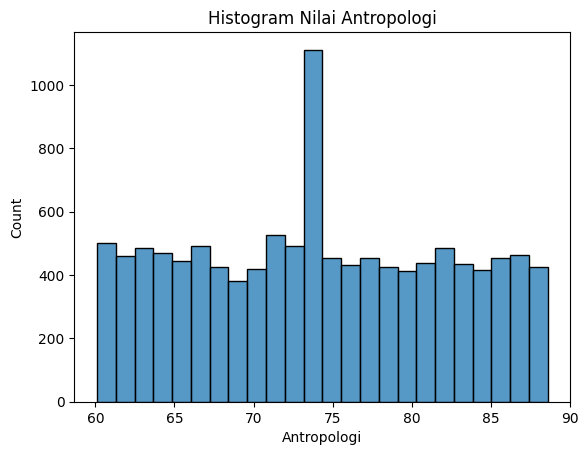

In [17]:
# Histogram Antropologi
sns.histplot(df["Antropologi"])
plt.title("Histogram Nilai Antropologi")

(array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400., 1600.]),
 [Text(0, 0.0, '0'),
  Text(0, 200.0, '200'),
  Text(0, 400.0, '400'),
  Text(0, 600.0, '600'),
  Text(0, 800.0, '800'),
  Text(0, 1000.0, '1000'),
  Text(0, 1200.0, '1200'),
  Text(0, 1400.0, '1400'),
  Text(0, 1600.0, '1600')])

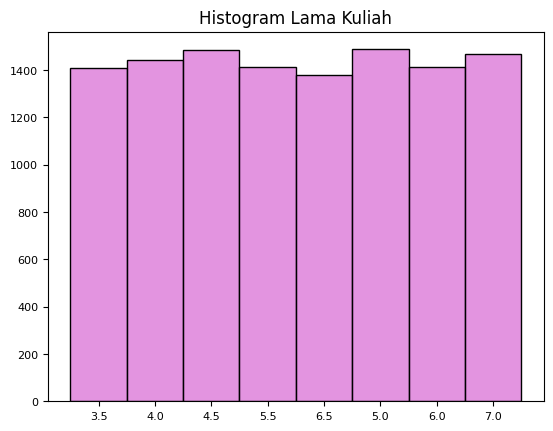

In [43]:
# Histogram Lama_Kuliah
sns.histplot(df["Lama_Kuliah"], color = color)
plt.title("Histogram Lama Kuliah")
plt.xlabel('')
plt.ylabel('')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

(array([  0., 200., 400., 600., 800.]),
 [Text(0, 0.0, '0'),
  Text(0, 200.0, '200'),
  Text(0, 400.0, '400'),
  Text(0, 600.0, '600'),
  Text(0, 800.0, '800')])

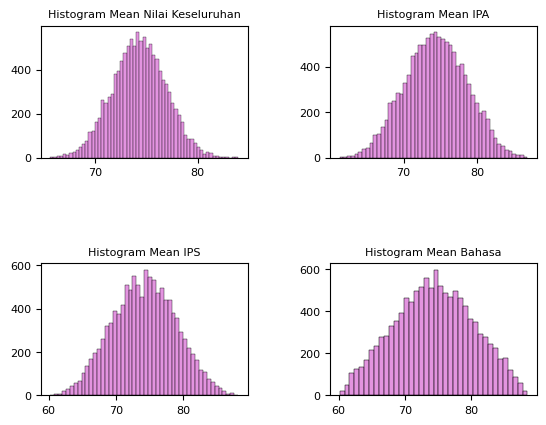

In [46]:
#Nilai Rata2
color = 'orchid'
fig = plt.figure()
fig.subplots_adjust(hspace=0.8, wspace=0.4)

ax = fig.add_subplot(2, 2, 1)
sns.histplot(df["Mean_Nilai"],ax=ax,color=color)
plt.title("Histogram Mean Nilai Keseluruhan", fontsize = 8)
plt.xlabel('')
plt.ylabel('')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

ax = fig.add_subplot(2, 2, 2)
sns.histplot(df["Mean_IPA"],ax=ax,color=color)
plt.title("Histogram Mean IPA", fontsize = 8)
plt.xlabel('')
plt.ylabel('')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

ax = fig.add_subplot(2, 2, 3)
sns.histplot(df["Mean_IPS"],ax=ax,color = color)
plt.title("Histogram Mean IPS", fontsize = 8)
plt.xlabel('')
plt.ylabel('')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

ax = fig.add_subplot(2, 2, 4)
sns.histplot(df["Mean_Bahasa"],ax=ax,color = color)
plt.title("Histogram Mean Bahasa", fontsize = 8)
plt.xlabel('')
plt.ylabel('')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

<AxesSubplot: title={'center': 'Barplot Lama_Kuliah'}>

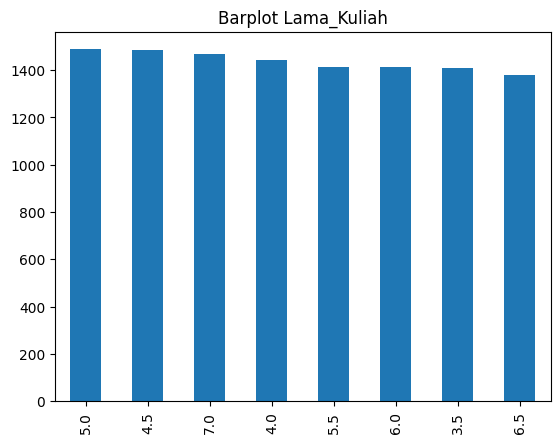

In [22]:
# Plot data lama kuliah
df["Lama_Kuliah"].value_counts().plot(kind='bar',title="Barplot Lama_Kuliah")

<AxesSubplot: title={'center': 'Fakultas'}>

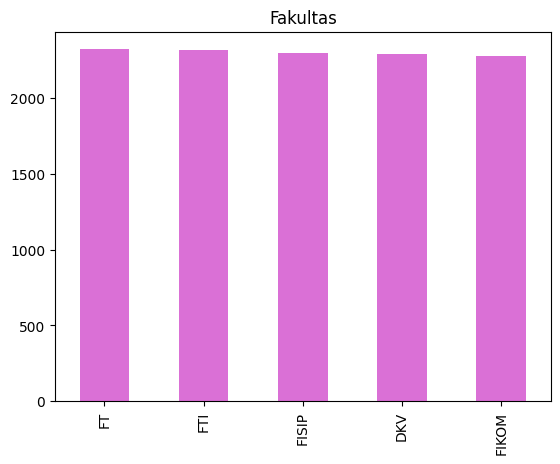

In [60]:
df = pd.read_csv('Train_Preprocessed_LamaKuliah.csv')
# Histogram Antropologi
df['Fakultas'].value_counts().plot(kind = 'bar', color = 'orchid', title = 'Fakultas')

In [59]:
df['Fakultas'].value_counts()

FT       2322
FTI      2316
FISIP    2299
DKV      2287
FIKOM    2275
Name: Fakultas, dtype: int64